# B"H

---

## Hacker stats using a game

---

In [5]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

---

In [6]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---

In [7]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/laz/repos/laz-main/edu/springboard/codebase
------------------------------
 
------------------------------
           src_dir            
/home/laz/repos/laz-main/edu/springboard/codebase/src
------------------------------
 


---

## Game rules


In [9]:
hf.display_images(
    p_dir = '/home/laz/repos/laz-main/edu/springboard/codebase/notebooks/files/01-python-for-ds-intro',
    p_file_pattern = '84*png')

### ../files/01-python-for-ds-intro/84-bet-exercise-rules.png
<img src="../files/01-python-for-ds-intro/84-bet-exercise-rules.png">

---

### Print one random game, i.e. 100 rolls of the dice 

In [16]:

# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
np.random.seed(123)

# Initialize random_walk
random_walk = [0]


for x in range(100):
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice (1 thru 6)
    dice = np.random.randint(1, 7)

    # Determine next step
    if dice <= 2:
        step = max(0, step - 1) # ensure doesn't go below 0
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1, 7)

    # Implement "clumsiness"
    if np.random.rand() <= 0.001 :
        step = 0

    # append next_step to random_walk
    random_walk.append(step)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [17]:
print(random_walk)

[0, 3, 2, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70]


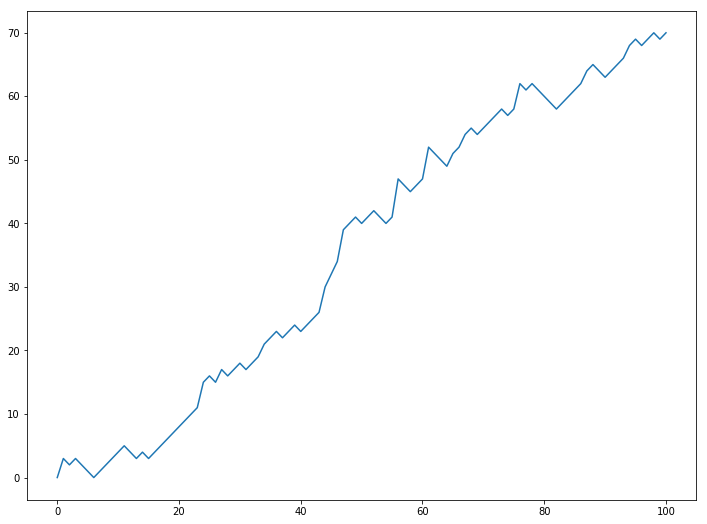

In [18]:
plt.plot(random_walk)
plt.show()


---
### Visualize 500 games


In [32]:
np.random.seed(123)

all_walks = []

# -- ----------------------------------------------

for i in range(500) :

    random_walk = [0]
    
    # -- ------------------------------------------
    for x in range(100) :
        
        step = random_walk[-1]
        
        dice = np.random.randint(1,7)
        
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
        
    # -- ------------------------------------------
    all_walks.append(random_walk)



In [33]:
print(all_walks[0])
print(all_walks[30])
print(all_walks[70])

[0, 3, 2, 3, 2, 1, 0, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 16, 15, 17, 16, 17, 18, 17, 18, 19, 21, 22, 23, 22, 23, 24, 23, 24, 25, 26, 30, 32, 34, 39, 40, 41, 40, 41, 42, 41, 40, 41, 47, 46, 45, 46, 47, 52, 51, 50, 49, 51, 52, 54, 55, 54, 55, 56, 57, 58, 57, 58, 62, 61, 62, 61, 60, 59, 58, 59, 60, 61, 62, 64, 65, 64, 63, 64, 65, 66, 68, 69, 68, 69, 70, 69, 70]
[0, 1, 0, 1, 3, 4, 3, 8, 9, 12, 13, 14, 15, 14, 18, 17, 18, 19, 20, 21, 22, 27, 28, 30, 29, 30, 31, 32, 31, 32, 31, 32, 33, 37, 43, 42, 43, 44, 43, 42, 41, 42, 47, 46, 47, 48, 47, 48, 47, 48, 47, 46, 47, 49, 50, 51, 50, 51, 52, 53, 54, 53, 52, 51, 52, 51, 52, 51, 50, 49, 50, 49, 48, 49, 48, 49, 53, 54, 53, 58, 59, 60, 63, 64, 69, 68, 67, 66, 67, 66, 65, 64, 66, 67, 68, 69, 68, 69, 68, 69, 70]
[0, 1, 0, 1, 2, 1, 4, 3, 4, 3, 2, 1, 0, 1, 3, 4, 5, 6, 5, 4, 3, 4, 5, 6, 7, 13, 12, 13, 12, 13, 12, 13, 14, 13, 16, 17, 18, 17, 16, 15, 14, 15, 14, 15, 16, 15, 14, 17, 18, 19, 20, 21, 20, 21, 20, 21, 24, 25, 24, 25, 24, 2

### Put into `numpy array`

In [34]:
np_all_walks = np.array(all_walks)

np_all_walks

array([[ 0,  3,  2, ..., 70, 69, 70],
       [ 0,  5,  4, ..., 90, 93, 94],
       [ 0,  0,  1, ..., 80, 81, 82],
       ...,
       [ 0,  1,  2, ..., 93, 92, 91],
       [ 0,  1,  0, ..., 59, 58, 57],
       [ 0,  1,  0, ..., 60, 61, 65]])

### Transpose the 2D numpy array 
- This is crucial in this case for plotting it

```
np.transpose converts rows to columns.
    For example, from this:
        [[0 3 2 3 2 1 0]
         [0 1 2 3 4 5 4]
         [0 0 1 0 1 2 3]
         [0 1 2 3 4 5 9]
         [0 1 0 2 1 2 3]
         [0 0 1 2 4 5 6]]
    
    ... to this:
        [[0 0 0 0 0 0]
         [3 1 0 1 1 0]
         [2 2 1 2 0 1]
         [3 3 0 3 2 2]
         [2 4 1 4 1 4]
         [1 5 2 5 2 5]
         [0 4 3 9 3 6]]
```

In [35]:
np_all_walks_t = np.transpose(np_all_walks)

np_all_walks_t

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 3,  5,  0, ...,  1,  1,  1],
       [ 2,  4,  1, ...,  2,  0,  0],
       ...,
       [70, 90, 80, ..., 93, 59, 60],
       [69, 93, 81, ..., 92, 58, 61],
       [70, 94, 82, ..., 91, 57, 65]])

### Plot it

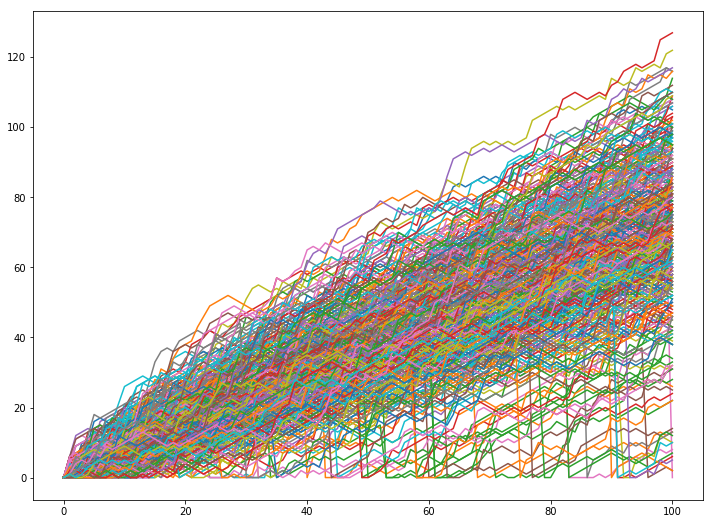

In [31]:
plt.plot(np_all_walks_t)
plt.show()

###  Note, how in some of the 500 simulations, the game indeed is taking a deep dive down because of the "clumsiness" rule!

---
### Let's zoom in to see the final score of each of the 500 games
- Select the last row. 
- This contains the endpoint of all 500 random walks you've simulated
- Each integer represents the end point score of a random walk

In [36]:
games_end_score = np_all_walks_t[-1]

games_end_score

array([ 70,  94,  82,  66, 107,  49,  72, 116,  65,  78,  87,  47,  81,
        75,  56,  70,  77,  88,  55,  42,  74,  64,  63,  58,  70,  55,
        93,  98,  58,  60,  70,  70,  72,  71,  47,  78,  78,  79,  71,
        83,  71,  56,  63,  94,  49,  72,  63,  74,  61,  61,  79,  91,
        46,  66,  70,  55,   0,  80,  45,  89,  91,  61,  83,  71,  60,
        68,  74,  85,  68,  88,  64,  84, 114,  61,  65,  78,  63,  61,
        90,  96,  83,  77,  80,  71,  87,  73,  60,  85,  84,  76, 105,
        57,  98,  46,  63, 112,  81,  45, 101,  74,  77,  13,  81,  47,
        97,  90,  66,  52,  63,  54,  91,  26, 101,  81,  64,  95,  83,
        99,  75,  75,  61,  97,  57,  94,  76,  82,  86,  52, 122, 110,
        91,  47,  34,  94, 106,  58,  74,  75,  93,  64,  57,  76, 100,
        66,  98,  94,  60,  72,  55,  85,  66,  69,  59,  78,  81,  87,
        75,  58,  80,  97,  75,  67,  22,   6,  78,  87,  87,  80,  80,
       108,  59,  83,  76,  60,  73,  75,   8, 116,  10, 106,  7

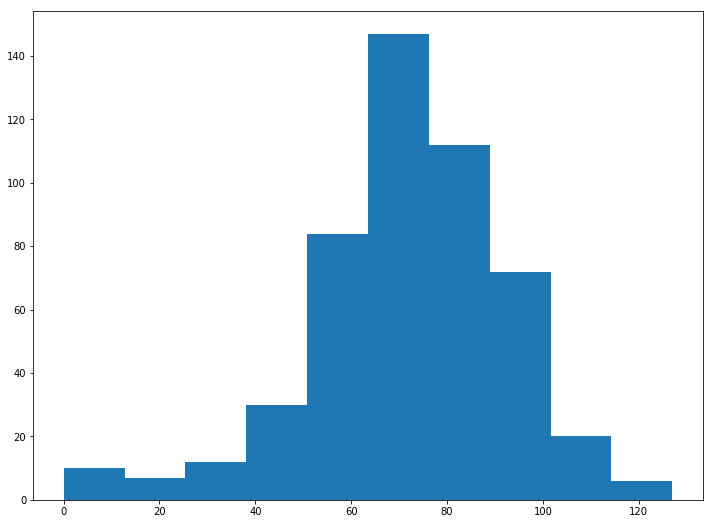

In [37]:
plt.hist(
    games_end_score, 
    bins = 10
)

plt.show()

---

### Calculate the chance that this end point >= 60
- can count the number of integers in `games_end_score` that are greater than or equal to 60 
- then divide that number by 500, the total number of simulations.


In [38]:
over_60 = len(
    games_end_score[games_end_score >= 60]
)

over_60

392

In [40]:
len(games_end_score)

500

In [41]:
# Percent of winning the bet
over_60/len(games_end_score) 

0.784